## **# Data Set Problems**

###### This dataset contains information about drug classification based on patient general information and its diagnosis.
Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.

###### The machine learning models used in this project are
1.Multinomial Naive Bayes

2.Categorical Navie Bayes

3.Bernolli Naive Bayes

4.Complement Naive Bayes

5.Logistic Regression



## ** 1. About Dataset** 

🏠 Tabel of Contents

Context

Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

Content

There are 6 variables in this data set:
The target feature is

Drug type

The feature sets are:

Age

Sex
Blood Pressure Levels (BP)
Cholesterol Levels
Na to Potassium Ration

The following is the structure of the data set.

Variable Name	Description	Sample Data
Age	Patient Age	23; 47; ...
Sex	Gender of patient
(male or female)	F; M; ...
BP	Levels of blood pressure
(high, normal, or low)	HIGH; NORMAL; LOW; ...
Cholesterol	Levels of cholesterol
(high or normal)	1.4; 1.3; ...
Na_to_K	Sodium to potassium ratio in blood	25.355; 13.093; ...
Drug	Type of drug	DrugY; drugC; ...

## **# 2. Overview of Dataset**

# import requirement libraries:

In [120]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# import from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [121]:


# import from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# import drug dataset

In [122]:
data = pd.read_csv('/content/drug_classification.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [8]:
df = pd.DataFrame(data)
print(f'df Shape: {df.shape}')
df.head()

df Shape: (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**👉 According to above information:**

It seems that there is no missing data, which will be checked further.
There are 4 categorical feature including Sex, BP, Cholesterol, Drug_Type
There are to numerical feature including Na_to_k, Age

## **3. Cleaning Dataset**

In [10]:
# check missing values:
df.isna().sum().to_frame('isna').T

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
isna,0,0,0,0,0,0


It seems that there is no missing data, but there may be invalid values, so we will check these values below:

In [12]:
# check invalid values:
for col in df:
    print(f"{col}: {df[col].unique()}\n")

Age: [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]

Sex: ['F' 'M']

BP: ['HIGH' 'LOW' 'NORMAL']

Cholesterol: ['HIGH' 'NORMAL']

Na_to_K: [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8

In [13]:
# check duplicated data
print(f"Number of dublicated: {df.duplicated().sum()}")

Number of dublicated: 0


 In next step convert categorical feature to numerical:

In [14]:
# Number of unique values in each categorical data:
categorical = df.select_dtypes(['object'])
for var in categorical:
    print(f"{var} contains {df[var].nunique()} labels")
    print(df[var].value_counts())
    print('-'*30)

Sex contains 2 labels
M    104
F     96
Name: Sex, dtype: int64
------------------------------
BP contains 3 labels
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
------------------------------
Cholesterol contains 2 labels
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
------------------------------
Drug_Type contains 5 labels
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug_Type, dtype: int64
------------------------------


In [15]:
# now convert categorical to numerical:
df2 = df.copy()
df2['Sex'] = df2.Sex.replace(['M', 'F'], [3, 2])
df2['BP'] = df2.BP.replace(['HIGH', 'NORMAL', 'LOW'], [4, 3, 2])
df2['Cholesterol'] = df2.Cholesterol.replace(['HIGH', 'NORMAL'], [3, 2])
df2['Drug_Type'] = df2.Drug_Type.replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1, 2, 3, 4, 5])
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,2,4,3,25.355,1
1,47,3,2,3,13.093,4
2,47,3,2,3,10.114,4
3,28,2,3,3,7.798,2
4,61,2,2,3,18.043,1
...,...,...,...,...,...,...
195,56,2,2,3,11.567,4
196,16,3,2,3,12.006,4
197,52,3,3,3,9.894,2
198,23,3,3,2,14.020,2


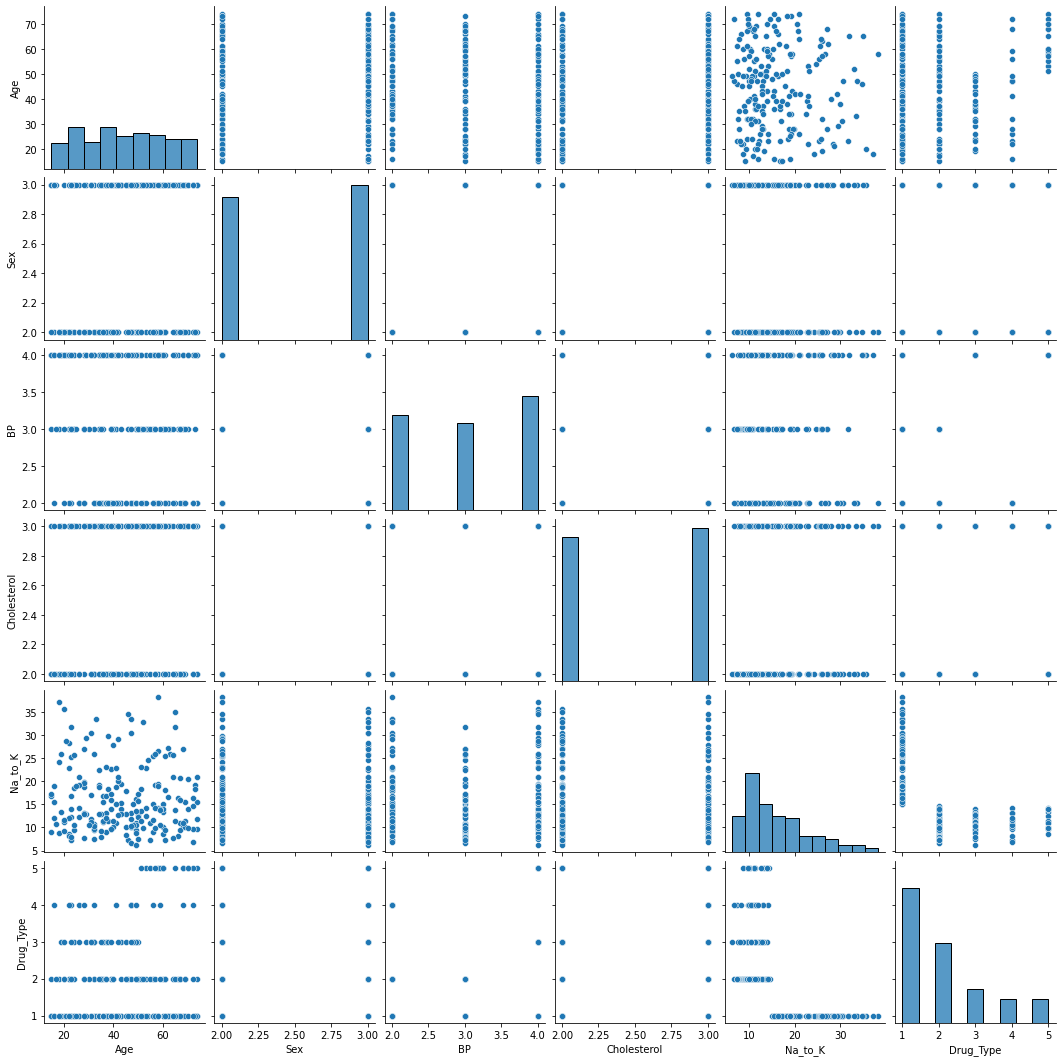

In [16]:
# check noise
%matplotlib inline
sns.pairplot(df2)
plt.show()


In [17]:
# Check missing value again to ensure
df2.isna().sum().to_frame().T

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,0,0,0,0,0,0


👉 According to the above figures, no noise can be seen.Now our dataset is clean and prepare for EDA

## **4. Exploratory Data Analysis (EDA)**

First check feature distribution

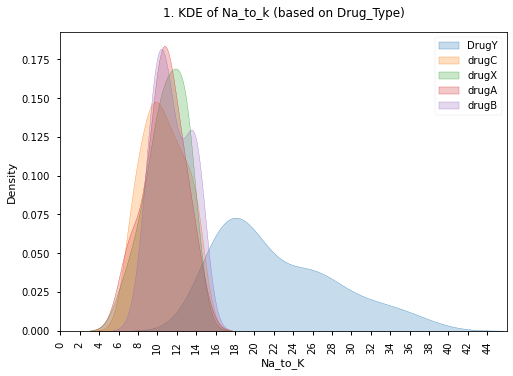

In [28]:
# check distribution of Na_to_k (based on Drug_Type)
%matplotlib inline
plt.style.use('seaborn-notebook')
for i, label in enumerate(df.Drug_Type.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Drug_Type'] == i+1, 'Na_to_K'], label=label, shade=True)
plt.title('1. KDE of Na_to_k (based on Drug_Type)',  pad=15)
plt.xticks(np.arange(0,46,2), rotation=90)
plt.xlim([0,46])
plt.legend()
plt.show()

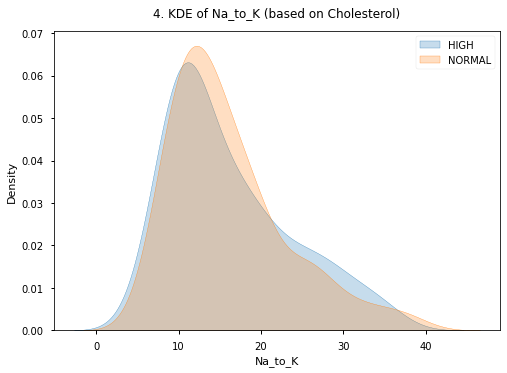

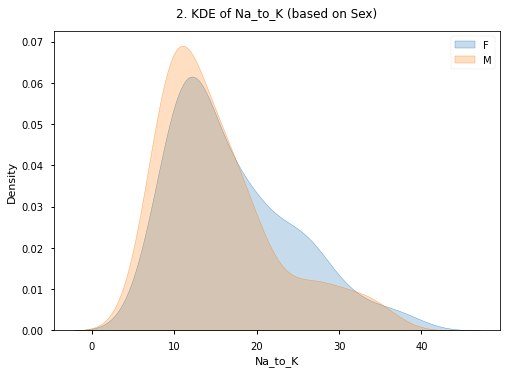

In [30]:
# check distribution of Na_to_K (based on Cholesterol)
for i, label in enumerate(df.Cholesterol.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Cholesterol'] == i+2, 'Na_to_K'], label=label, shade=True)
plt.title('4. KDE of Na_to_K (based on Cholesterol)', pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()# check distribution of Na_to_K (based on Sex)
for i, label in enumerate(df.Sex.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Sex'] == i+2, 'Na_to_K'], label=label, shade=True)
plt.title('2. KDE of Na_to_K (based on Sex)', pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

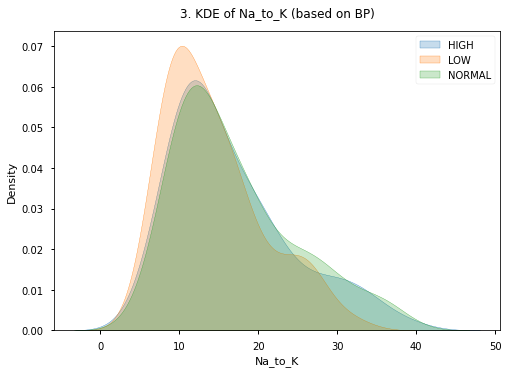

In [26]:
# check distribution of Na_to_K (based on BP)
for i, label in enumerate(df.BP.unique().tolist()):
    sns.kdeplot(df2.loc[df2['BP'] == i+2, 'Na_to_K'], label=label, shade=True)
plt.title('3. KDE of Na_to_K (based on BP)' , pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

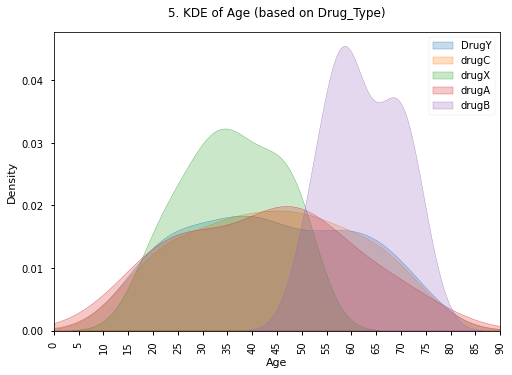

In [32]:
# check distribution of Age (based on Drug_Type)
for i, label in enumerate(df.Drug_Type.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Drug_Type'] == i+1, 'Age'], label=label, shade=True)
plt.title('5. KDE of Age (based on Drug_Type)', pad=15)
plt.xticks(np.arange(0,91,5), rotation=90)
plt.xlim([0,90])
plt.legend()
plt.show()

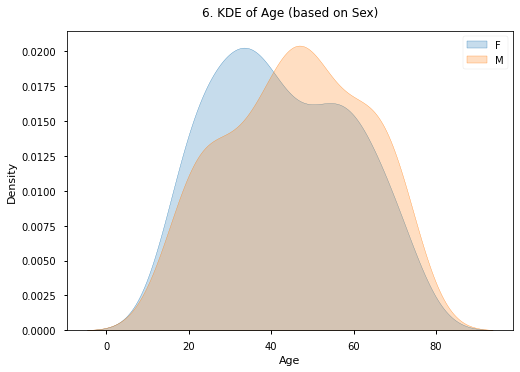

In [34]:
# check distribution of Age (based on Sex)
for i, label in enumerate(df.Sex.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Sex'] == i+2, 'Age'], label=label, shade=True)
plt.title('6. KDE of Age (based on Sex)',  pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

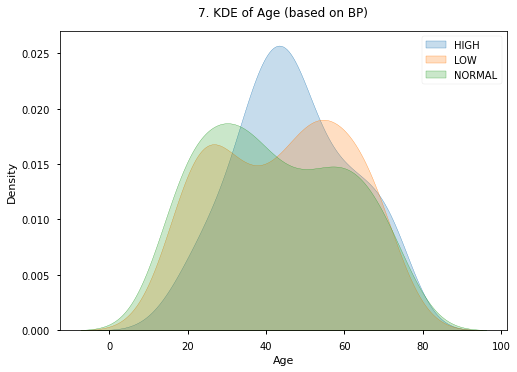

In [35]:
# check distribution of Age (based on BP)
for i, label in enumerate(df.BP.unique().tolist()):
    sns.kdeplot(df2.loc[df2['BP'] == i+2, 'Age'], label=label, shade=True)
plt.title('7. KDE of Age (based on BP)', pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

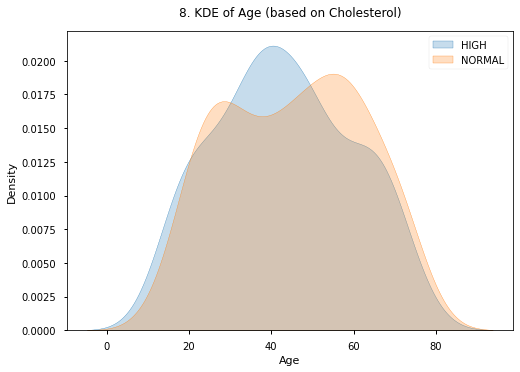

In [36]:
# check distribution of Age (based on Cholesterol)
for i, label in enumerate(df.Cholesterol.unique().tolist()):
    sns.kdeplot(df2.loc[df2['Cholesterol'] == i+2, 'Age'], label=label, shade=True)
plt.title('8. KDE of Age (based on Cholesterol)', pad=15)
# plt.xticks(np.arange(0,91,5), rotation=90)
# plt.xlim([0,90])
plt.legend()
plt.show()

👉 According to above kde plots:

For people with Na_to_K more than 16, drug y is often prescribed (figure 1).
The rate of Na_to_K is not much different in male and female (figure 2).
The Na_to_K seems to have no correlation with the BP and Cholesterol (figure 3,4).
It seems that drug X is mostly prescribed for people under 50 years old and drug B is prescribed for people over 50 years old. Other drugs are normally distributed in all ages and have no special correlation with Age (figure 5).
Most people between the ages of 40 and 50 have a HIGH BP (figure 7).
Most people between the ages of 35 and almost 50 have a HIGH Cholesterol (figure 8).

## **4.1. Univariate Analysis**

In [37]:
df2.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315,16.544,15.000,31.000,45.000,58.00,74.000
Sex,200.0,2.520,0.501,2.000,2.000,3.000,3.00,3.000
BP,200.0,3.065,0.839,2.000,2.000,3.000,4.00,4.000
Cholesterol,200.0,2.515,0.501,2.000,2.000,3.000,3.00,3.000
Na_to_K,200.0,16.084,7.224,6.269,10.446,13.936,19.38,38.247
Drug_Type,200.0,2.060,1.271,1.000,1.000,2.000,3.00,5.000


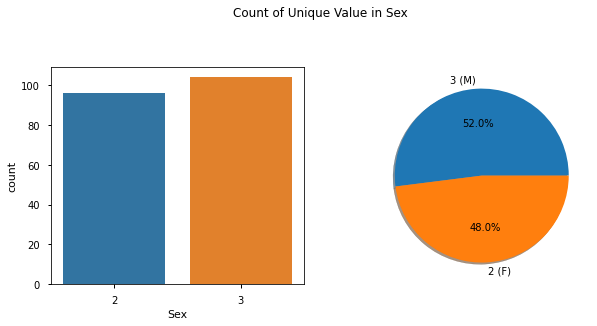

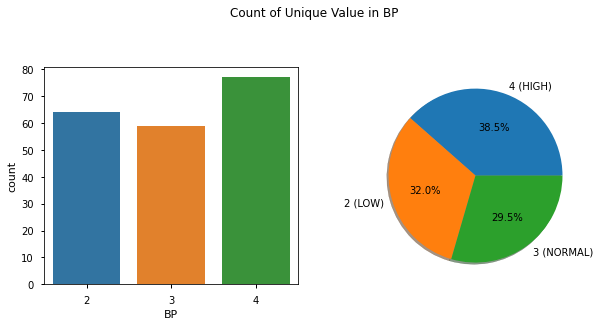

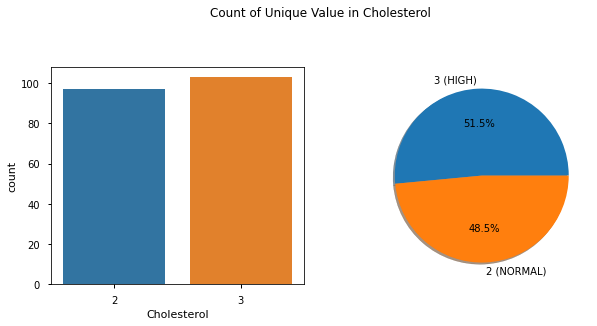

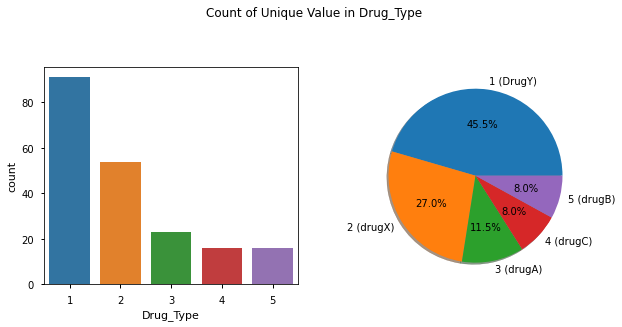

In [139]:
# draw countplot and pie plot of categorical data
for col in categorical:

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df2, x=col, ax=axes[0])
    
    # count of col (pie chart)
    slices = df2[col].value_counts().values
    activities = [f"{i} ({var})" for i, var in zip(df2[col].value_counts().index, df[col].value_counts().index)]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col}', y=1.09, )
    plt.show()

👉 According to above plots:

The age range in the dataset is between 15 and 74 years and most of them are middle-aged.
The Na_to_K rate of the people in the dataset is 16 on average.
Number of male and female is not much different. The number of men is slightly more.
The number of people with HIGH BP is more than the number of people with low or NORMAL BP.
The number of people with HIGH Cholesterol and people with NORMAL Cholesterol is not much differnt.
The most prescribed drugs are drugs y and x, respectively. Also, drugs B and C have the lowest amount of prescription.

## **4.2. Bivariate Analysis**

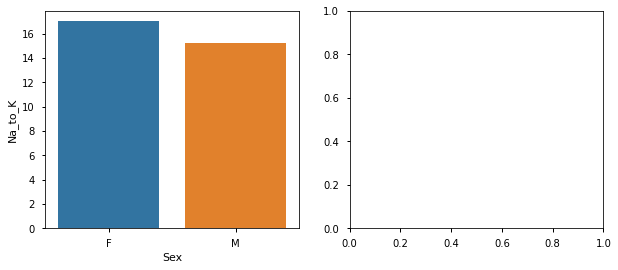

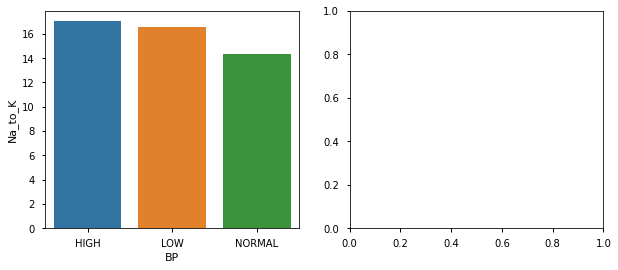

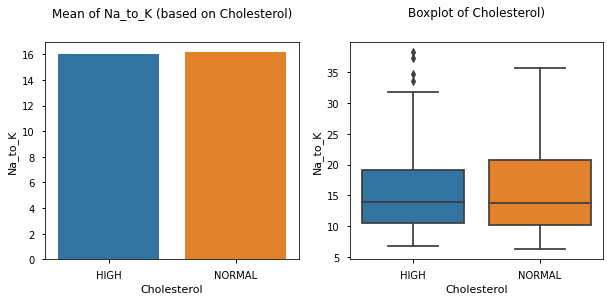

In [70]:
# Mean of Age and Na_to_K based on each feature
for col in ['Sex', 'BP', 'Cholesterol']:
    fig , ax= plt.subplots(1,2, figsize=(10,4))
    gp = df.groupby([col])['Na_to_K'].mean().to_frame().reset_index()
    sns.barplot(data=gp, x=col, y='Na_to_K', ax=ax[0])
for container in ax[0].containers:ax[0],(container)
ax[0].set_title(f'Mean of Na_to_K (based on {col})', y=1.09)
sns.boxplot(data=df, x=col, y='Na_to_K', ax=ax[1])
ax[1].set_title(f'Boxplot of {col})', y=1.09 )
plt.show()

  


In [66]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


👉 According to above plots:

A, B, and C drugs are mostly prescribed for male.
Drug X is equally prescribed for male and female.
Y drug is mostly prescribed for female.
The people who were prescribed drug B all had HIGH BP, and the people who were prescribed drug C all had LOW BP.
For people who had normal BP, only one of X or Y drugs was prescribed.
A and B drugs have not been prescribed for any of the people with LOW BP.
X and C drugs have not been prescribed for any of the people with HIGH BP.
Drug C has not been prescribed for any of the people who have HIGH Cholesterol.
People with higher BP have a higher Na_to_K ratio on average. As a result, it seems that these two features have a relative correlation.

## **4.3. Multivariate Analysis**

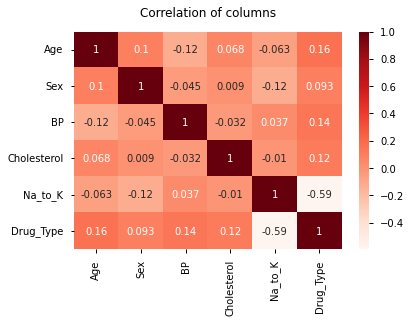

In [72]:
# draw heatmap for take a look to correlation of features
sns.heatmap(round(df2.corr(),3), cmap='Reds', annot=True)
plt.title('Correlation of columns', pad=15)
plt.show()

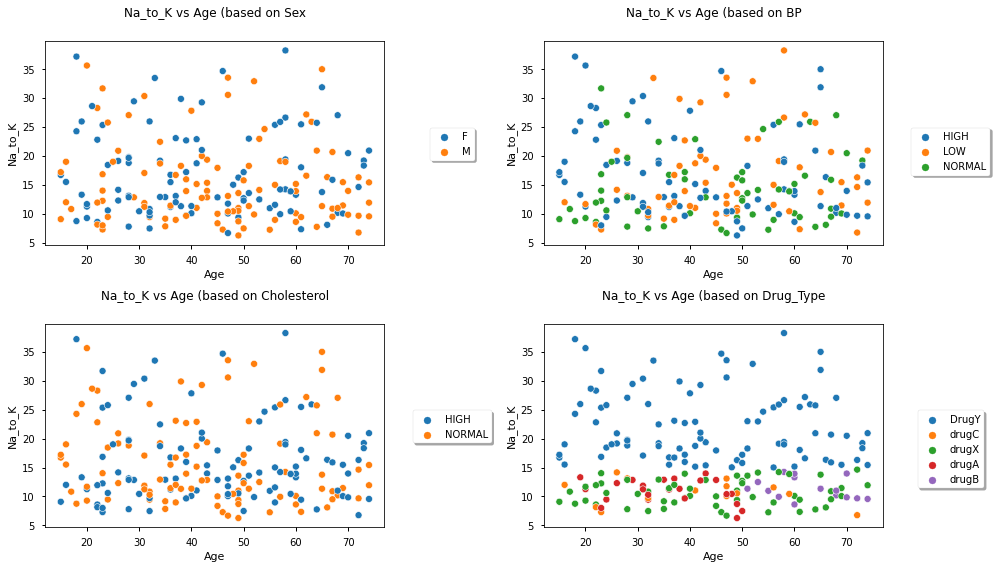

In [75]:
# use scatter plot for numerics feature (Age and Na_to_K)
fig, ax = plt.subplots(2,2,figsize=(14,8))
for i, col in enumerate(['Sex', 'BP', 'Cholesterol', 'Drug_Type']):
    sns.scatterplot(data=df, x='Age', y='Na_to_K', hue=col, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Na_to_K vs Age (based on {col}', y=1.09)
    ax[i//2, i%2].legend(loc='upper center', bbox_to_anchor=(1.2, 0.6),
        fancybox=True, shadow=True)

fig.tight_layout() 
plt.show()

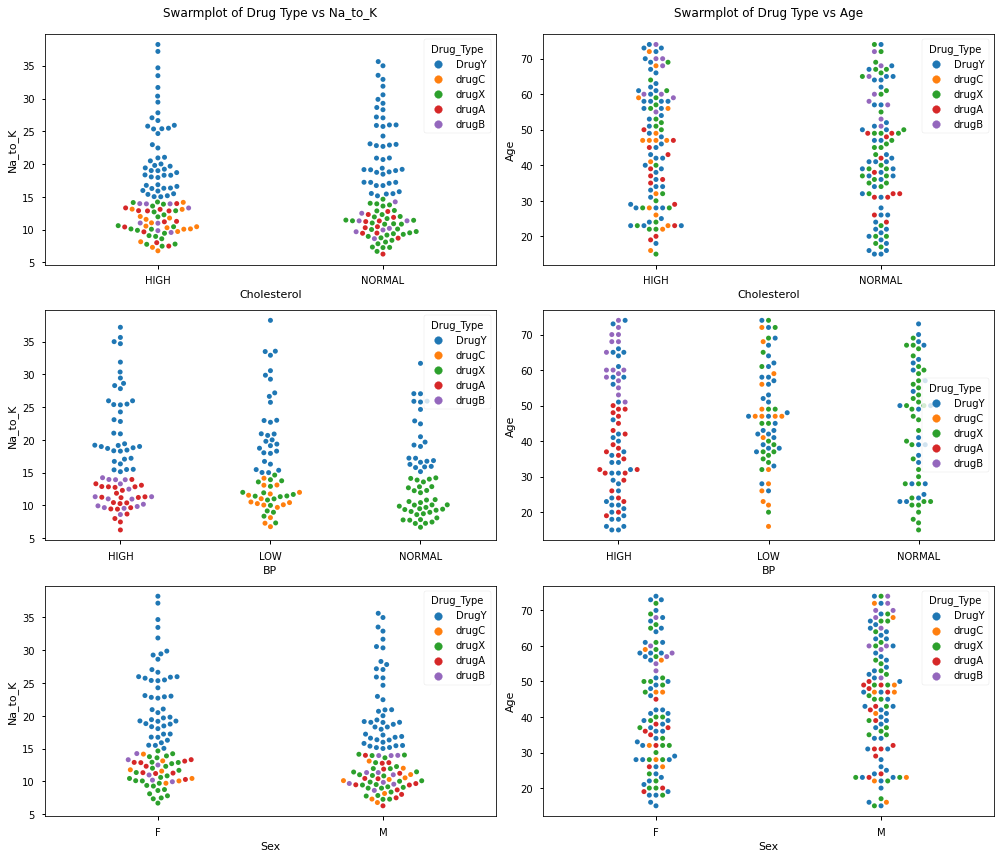

In [77]:
fig, ax = plt.subplots(3,2,figsize=(14,12))
sns.swarmplot(data=df, x='Cholesterol', y='Na_to_K', hue='Drug_Type', ax=ax[0,0])
sns.swarmplot(data=df, x='Cholesterol', y='Age', hue='Drug_Type', ax=ax[0,1])
sns.swarmplot(data=df, x='BP', y='Na_to_K', hue='Drug_Type', ax=ax[1,0])
sns.swarmplot(data=df, x='BP', y='Age', hue='Drug_Type', ax=ax[1,1])
sns.swarmplot(data=df, x='Sex', y='Na_to_K', hue='Drug_Type', ax=ax[2,0])
sns.swarmplot(data=df, x='Sex', y='Age', hue='Drug_Type', ax=ax[2,1])
ax[0,0].set_title('Swarmplot of Drug Type vs Na_to_K',y=1.05)
ax[0,1].set_title('Swarmplot of Drug Type vs Age',y=1.05)
plt.tight_layout()
plt.show()

👉 According to above plots:

For the Na_to_K rate more than 15, only drug Y is prescribed.
Drug X is prescribed for peaple with a Na_to_K rate less than 15 and by LOW or NORMAL level of and BP.
Drug C is prescribed for peaple with a Na_to_k rate less than 15 and by HIGH Cholesterol and LOW BP
Drug B is prescribed only for people over 50 years old with a Na_to_K rate of less than 15 by HIGH BP.
Drug A is prescribed only for people under 50 years old with a Na_to_K rate of less than 15 by HIGH BP.

## **5. Models and Improve Models**

5. Models and Improve Models



First preparing dataset for create model

In [78]:
df3 = df.copy()
df3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


We can see here that the minimum and maximum ages are 15 and 74 respectively and the minimum and maximum sodium to potassium ratios are 6.269 and 38.247 respectively.





👉 The age will be divided into 7 age categories:

* Below-20 y.o.

* 20 - 29 y.o.  
* 20 - 29 y.o.
* 30 - 39 y.o.
* 40 - 49 y.o.
* 50 - 59 y.o.
* 60 - 69 y.o.
* Above 70.

In [92]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['20s', '20s', '30s', '40s', '50s', '60s', '60s']



In [93]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df3['Na_to_K_binned'] = pd.cut(df3['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df3 = df3.drop(['Na_to_K'], axis = 1)

In [94]:
df4 = pd.get_dummies(df3.drop('Drug_Type', axis=1))
df4.insert(18, 'Drug_Type', df3.Drug_Type)
df4['Drug_Type'] = df4.Drug_Type.replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1, 2, 3, 4, 5])
df4

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30,Drug_Type
0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,4
2,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,4
3,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,2
4,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,4
196,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,4
197,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,2
198,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,2


## **5.1. MultinomialNB( )**



The multinomial Naive Bayes classifier is suitable for classification with discrete features

In [106]:
# try to imporve model by changing test_size
test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test'])
for i, test_size in enumerate(test_sizes):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    acc_test_i = metrics.accuracy_score(y_test, y_pred_test)
    acc_train_i = metrics.accuracy_score(y_train, y_pred_train)
    acc_table.loc[len(acc_table.index)] = [f"Model 1_{i}", str(test_size), acc_train_i, acc_test_i]
acc_table.sort_values(by=['ACC_test'], ascending=False).style.background_gradient(cmap='summer_r')

,Model,test_size,ACC_train,ACC_test
0,Model 1_0,0.2,0.831250,0.825000
1,Model 1_1,0.25,0.833333,0.820000
4,Model 1_4,0.4,0.808333,0.775000
2,Model 1_2,0.3,0.800000,0.750000
3,Model 1_3,0.35,0.800000,0.742857
5,Model 1_5,0.45,0.781818,0.700000


As can be seen in the table above, the best value for the size test is the initial value of 0.2. So the best model so far is the inital model.